# Lección 6: Random Forest

### Ejercicios de pair programming 31 de enero.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# abrimos el df con los datos estandarizados y codificados
df_est = pd.read_csv("datos/est_enc_airlines.csv", index_col = 0)
df_est.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0
2,1,1,1,-1.041667,1,0,-1.5,-1.5,-1.5,0.0,...,-0.666667,-1.0,-0.333333,0.0,1.0,0.0,-1.0,0.000000,0.000000,0.0
3,1,1,1,0.833333,1,0,-1.5,-1.5,-1.5,0.0,...,-1.000000,-3.0,-1.333333,-1.5,1.0,-1.5,-0.5,0.000000,0.000000,0.0
4,1,1,1,1.250000,1,0,-1.5,-1.5,-1.5,0.0,...,-0.666667,-2.0,-1.333333,-1.0,1.0,-1.0,0.5,0.000000,0.000000,0.0


In [3]:
# separamos los datos en X e y
X1 = df_est.drop("satisfaction", axis = 1)
y1 = df_est["satisfaction"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
param = {"max_depth": [2,4, 6],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), 
            param_grid= param, 
            cv=10, 
            verbose=-1) 

In [7]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [8]:
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [ ]:
#for arbol in tqdm(bosque.estimators_):
    #fig = plt.figure(figsize=(20, 10))
    #tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    #plt.show()

In [9]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [10]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [11]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.906645,0.903671,0.929515,0.916411,0.810753,test,Random Forest
1,0.905288,0.902789,0.926461,0.914471,0.808405,train,Random Forest


In [12]:
# abrimos el df con los resultados de nuestros modelos anteriores
df_LR_DT_results = pd.read_csv("datos/resultados_airlines_LR_DT.csv", index_col = 0)
df_LR_DT_results

,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.837157,0.852453,0.851619,0.852036,0.670988,test,Regresión logistica Esta
3,0.835329,0.849347,0.849347,0.849347,0.667781,train,Regresión logistica Esta
6,0.870034,0.861253,0.910636,0.885256,0.735679,test,Decision tree Esta II
7,0.869379,0.859231,0.910101,0.883935,0.734867,train,Decision tree Esta II


In [13]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo
df_todos_resultados = pd.concat([dt_results, df_LR_DT_results], axis = 0)
df_todos_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.906645,0.903671,0.929515,0.916411,0.810753,test,Random Forest
1,0.905288,0.902789,0.926461,0.914471,0.808405,train,Random Forest
2,0.837157,0.852453,0.851619,0.852036,0.670988,test,Regresión logistica Esta
3,0.835329,0.849347,0.849347,0.849347,0.667781,train,Regresión logistica Esta
6,0.870034,0.861253,0.910636,0.885256,0.735679,test,Decision tree Esta II
7,0.869379,0.859231,0.910101,0.883935,0.734867,train,Decision tree Esta II


In [14]:
# creamos una gráfica para poder hacer la comparativa visualmente
df_todos_resultados.style.background_gradient(cmap='Spectral')

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.906645,0.903671,0.929515,0.916411,0.810753,test,Random Forest
1,0.905288,0.902789,0.926461,0.914471,0.808405,train,Random Forest
2,0.837157,0.852453,0.851619,0.852036,0.670988,test,Regresión logistica Esta
3,0.835329,0.849347,0.849347,0.849347,0.667781,train,Regresión logistica Esta
6,0.870034,0.861253,0.910636,0.885256,0.735679,test,Decision tree Esta II
7,0.869379,0.859231,0.910101,0.883935,0.734867,train,Decision tree Esta II


Después de realizar varios modelos, vemos que el mejor resultado, es el del método Random Forest.

- **Accuracy:** Nuestro modelo acierta el 90% de las veces.
  
- **Precision:** Nuestro valor es de 0.9, eso significa que nuestro modelo se equivocará un 10% de las veces que prediga que un cliente no estará satisfecho.
- **Recall:** Tenemos un valor de 0.92, es decir que nuestro modelo es capaz de identificar un 92% de los pasajeros insatisfechos.
- **Kappa:** Nuestro valor es de 0.80; lo que implica que la concordancia de nuestros datos es muy buena y nuestro modelo no está acertando sus predicciones al azar.
- **F1:** Se acerca mucho a 1, por lo que nuestra media es muy buena.

In [15]:
# creamos un dataframe con la importancia de cada una de las variables incluidas en el modelo
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )

# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
10,inflight_entertainment,0.274268
5,seat_comfort,0.137875
12,ease_of_online_booking,0.095496
11,online_support,0.094287
1,customer_type,0.062518
13,on-board_service,0.054011
14,leg_room_service,0.047531
4,class,0.039744
18,online_boarding,0.036564
7,food_and_drink,0.034732


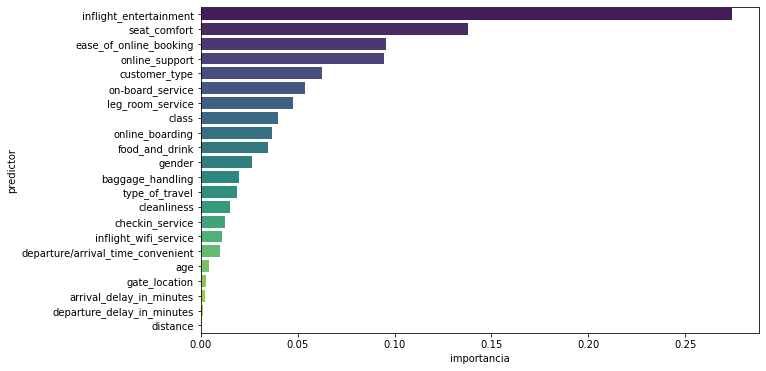

In [16]:
# creamos una gráfica para ver de forma visual la importancia de cada columna predictora
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Como vemos en el gráfico, las columnas predictoras más importantes són el entretenimiento durante el vuelo y la comodidad del asiento.